# Amplitude spectrum, PSD spectrum and Parseval...

*A. Dauptain, Cerfacs Training, Last Revision Oct. 2023*


## Generalities
Studying the frequential behavior of a system is sometimes useful in order to highlight determined instabilities. To do so, it is common to plot the spectrum of a physical parameter (such as pressure, acceleration,... ) using the [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform).

During this tutorial, we will create a periodic signal, then we will introduce a noise. In the end, using the Fast Fourier Transform, we will find out the frequencies of the initial signal and the spectrum of the noise.

## Objectives
   
- Generate a harmonic signal
- Generate a noise
- Plot the Amplitude Spectrum of a function **robust against signal changes**
- Plot the Power Density Spectrum of a function **robust against signal changes**
- Check the validity of our **robust** estimators
   
   
   

In these blanks, you may whether put a number, a variable or an expression. At the end of a code block, you may find some "assert" tests in order to check if what you entered is correct.

### 1) Generate a harmonic signal

Let us create a sine signal, it is up to
you to choose the frequency of your sine (in Hertz), its amplitude and its mean value. You also have to choose the number of time samples for one sinewave.

NB: the number of time samples has to be even. If you want to see the influence of a change of the number of time samples, we recommend to use a power of 2 like 32, 64, 128, 256, 512, 1024...

By the way, the expression of a sine signal (without phase shift) is:

$$x(t)=U_0+A\sin(2 \pi f_0 t)$$

with $U_0$ the mean value of the signal, $A$ the amplitude of the sinewave and $f_0$ the frequency of the sine.

In [1]:
# First, we call the libraries we are going to use in this tutorial
import numpy as np
import matplotlib.pyplot as plt

Create a time vector going from 0 to 1.5 second with 1024 time steps. To do so, you can use the `linspace` function from `numpy` library (https://www.numpy.org/devdocs/reference/generated/numpy.linspace.html).

In [60]:
time = np.linspace(0, 1.5, 1024)
assert len(time) == 1024
assert time[-1] - time[0] == 1.5

Then we create the function which will create our pure signal.

In [61]:
def get_sine(time_vector : tuple, mean_value : float, amplitude : float, main_frequency : float) :
    
    """This function creates a sine signal using the time vector provided and with 
    the mean_value, amplitude and main_frequency parameters provided. """
    
    # Define the signal vector
    signal_vector = mean_value + amplitude*np.sin(2*np.pi*time_vector*main_frequency)
    return signal_vector

Now, you will use the `time` vector and the function `get_sine()` you have just created to generate a signal and plot it with `matplotlib.pyplot.plot()` (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=pyplot%20plot#matplotlib.pyplot.plot). 

Generate a signal which mean value is 5, amplitude is 10 and main frequency is 8.

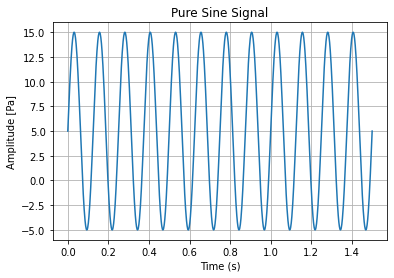

In [62]:
signal = get_sine(time, 5, 10, 8)
plt.plot(time, signal)
plt.title('Pure Sine Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [Pa]')
plt.grid(True)

### 2) Generate a noise

We are now going to create a vector faking a noise. We will use a function calculating a random number for each time step. The `numpy`function `random.random(N)`gives a vector of N values between 0 and 1 (https://www.numpy.org/devdocs/reference/generated/numpy.random.random.html#numpy.random.random).

In [49]:
def get_noise(time_vector : tuple, noise_amp : float) :
    
    """This function creates a vector of the same length of the vector you give and which values are random floats"""
    
    # Create a vector of the length of the time vector which values are random numbers between -1 and 1
    noise_vector = np.random.random(len(time_vector)) * 2 - 1 
    
    # Multiply the vector you have just created by the amplitude parameter
    noise_vector *= noise_amp
    return noise_vector

Create a noisy signal of the length of the time vector and of amplitude 8.

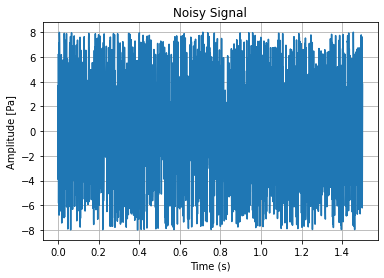

In [50]:
noise = get_noise(time, 8)
plt.plot(time, noise)
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [Pa]')
plt.grid(True)

### 3) generate the test signal

Generate the test signal you want here with sine compnent, noise component and mean value component


Now, you will use the two functions get_sine and get_noise to create a noisy sine signal (you can choose the parameters) 

**Change only here and refer always to this signal using time1 and signal1**


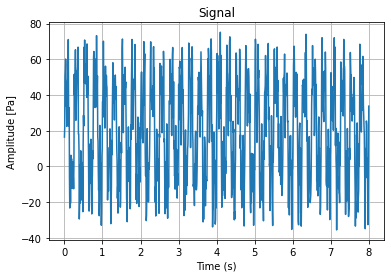

In [51]:
time1 = np.linspace(0, 8., 1024)
signal1 = get_sine(time1, mean_value=10, amplitude=30, main_frequency=4)

signal1 += get_sine(time1, mean_value=10, amplitude=20, main_frequency=12)
# add noise or not
signal1 += get_noise(time1, 20)


plt.plot(time1, signal1)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [Pa]')
plt.grid(True)

### 4) The Fast Fourier Transform
The definition of the Fourier Transform in the case of a continuous signal is :
$$\mathcal{F}[x(t)]=X(f)=\int_{-\infty}^{+\infty} x(t)\mathrm{e}^{-\mathrm{i}2\pi ft}\mathrm{d}t$$

We notice that the Fourier Transform of a signal is a complex function and its dimension is amplitude.time. When studying the spectrum of a signal, it is common to focus on the **amplitude** of this spectum. Assuming that the value of the Fourier transform for a certain frequency is $X(f_0)=a+\mathrm{i}b$ the amplitude is defined as: $A=\sqrt{(a^2+b^2)}$ 

Since we are computing a signal, we are no more considering a continuous signal but a discrete one. In fact, what we do is to pick the value of the signal regularly, at a determined time step. This method gives us a vector. Thus we must use a discrete version of the Fourier transform (DFT) defined as follow:
$$\mathrm{X}_k=\frac{1}{N}\sum_{n=0}^{N-1} x_n\mathrm{e}^{-\mathrm{i}\frac{2\pi}{N} nk}             , k=0,1,...N-1$$

The numpy library helps you doing this caculation with `numpy.fft.fft()` function. The value returned by this function is a vector of N complex components. 

**NB:** There are different cenventions to calculate the DFT. The $\frac{1}{N}$ factor is a normalization that may be applied either on the Fourier Transform (multiplying by $\frac{1}{N}$), on the inverse Fourier Transform (multiplying by $\frac{1}{N}$) or on both (multiplying by $\frac{1}{\sqrt{N}}$ for each operation). Numpy's fft algorithm applies the $\frac{1}{N}$ factor only on the inverse Fourier Transform.

A characteristic of the discrete Fourier transform is that the frequency domain is taken from 0 to $(N − 1)\Delta f$. The line of symmetry is at a frequency of $\text{N}\Delta f/2$ which marks the Nyquist frequency (one half of the sampling rate). Shannons sampling theorem states that **a sampled time signal must not contain components at frequencies above the Nyquist frequency** (See the [noisy channel coding theorem](https://en.wikipedia.org/wiki/Noisy-channel_coding_theorem)).
The frequency resolution is defined as the inverse of the time range. The longer is your time sample, the more precise will be your spectrum.

#### Amplitude spectrum

Now, we will create our spectrum analyzer. Spectrum analyzer devices typically represent the Fourier transform in terms of magnitude and phase rather than real and imaginary components. Furthermore, spectrum analyzers typically only show only half the total frequency band due to the symmetry relationship.

The values of the one-sided **amplitude** Fourier transform of your signal must be calculated as follow:

$$X_k =\text{Magn} \left( \frac{1}{N} \sum_{n=0}^{N-1} x_n\mathrm{e}^{-\mathrm{i}\frac{2\pi}{N} nk} \right)   , k=0$$

$$X_k =2\text{ Magn}\left(\frac{1}{N} \sum_{n=0}^{N-1} x_n\mathrm{e}^{-\mathrm{i}\frac{2\pi}{N} nk} \right)    , k=1,2,...\frac{N}{2} -1$$

with $X_k$ the k-value of the Fourier transform vector and N an even integer. Note that k = 0 is a special case. The Fourier transform at this frequency is already at full-amplitude.

We are now going to define a function in order to calculate the one-sided **amplitude** Fourier transform of a signal. For this you will need to refer to [Numpy's FFT function](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html). Have a look at the [Numpy's FFT normalization](https://numpy.org/doc/stable/reference/routines.fft.html#normalization), before realizing this core function itself must be handled with care.

In [52]:
# Define the calculation parameters according to spectral analysis theory.
def amplitude_spectrum(time_vect : tuple, signal_vect : tuple) :
    """This function automates the creation of the Fourier Transform of a signal."""
    
    ## No tricks 1
    # First the 2 times
    total_time = time_vect[-1] - time_vect[0]
    dt = time_vect[1] - time_vect[0]
    #The the two ferencies
    freq_resolution = 1.0 / total_time
    freq_nyquist = 1. / dt
    
    # samples
    N = len(time_vect)
    
    # build frequency
    frequency = np.arange(0, freq_nyquist, freq_resolution, dtype=float)
    frequency = frequency[: int(N / 2) - 1]  # limit to the first half

    # The 3 versions of np.fft norm
    #raw_fft = np.fft.fft(signal_vect, norm="forward")
    
    #raw_fft = np.fft.fft(signal_vect, norm="ortho")
    #raw_fft /= np.sqrt(N)
    
    # default
    raw_fft = np.fft.fft(signal_vect, norm="backward")
    raw_fft /= N
    
    # Takes half, but double the content, excepted the first component
    amplitude = 2*np.absolute(raw_fft)[:int(N/2) - 1] 
    amplitude[0] /= 2
    
    return frequency, amplitude

Now, you will use the function `amplitude_spectrum` to plot the amplitude spectrum of your signal.

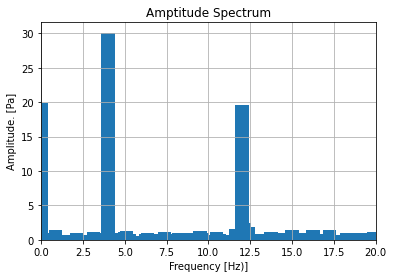

In [53]:

frequency, amplitude = amplitude_spectrum(time1, signal1)


plt.bar(frequency, amplitude)
plt.title('Amptitude Spectrum')
plt.xlabel('Frequency [Hz)]')
plt.ylabel('Amplitude. [Pa]')
plt.xlim([0,20])
plt.grid(True)


You should get an amplitude spectrum with a peak at 10 Hz of the amplitude of the mean value of your sine and an other one at the main frequency of the sine and of the amplitude of the sine. The rest of the spectrum is the signature of the noise.

**Warning:** If the main frequency of you sine wave is close to the Nyquist frequency, you may not find the amplitude of your sine, but this topic will not be discussed here (_hic sunt leones_).


### 5) Power Spectral Density (PSD)

The PSD of a continuous signal $x(t)$ of Fourier Transform $X(f)$ is defined as:
$$S(f)=\lim_{T \to \infty}\dfrac{1}{T}X(f)X^*(f)$$
For a discrete signal, the PSD is defined as:
$$PSD_k=\left[\dfrac{F_kF_k^*}{\Delta f}\right], k=0$$
$$PSD_k=\dfrac{1}{2}\left[\dfrac{F_kF_k^*}{\Delta f}\right], k=1, ..., \dfrac{N}{2}-1$$

with $N$ an even integer, $\Delta f$ the frequency resolution and $F_k$ the Fourier coefficients normalized to be an amplitude. We normalize it by $\sqrt N$. The $\frac{1}{2}$ comes from the fact that the mean square of a sine wave is equal to half its amplitude. The $k=0$ case does not require this peak to mean square conversion since the mean square value is equal to the peak value for a signal with zero frequency.

In [54]:
def PSD(time_vect:tuple, signal_vect:tuple):
    """This function automates the computation of the Power Spectral Density of a signal."""
    # Same as amplitude spectrum START ===================
    
    total_time = time_vect[-1] - time_vect[0]
    dt = time_vect[1] - time_vect[0]
    freq_resolution = 1.0 / total_time
    freq_nyquist = 1. / dt
    
    # samples
    N = len(time_vect)
    
    # build frequency
    frequency = np.arange(0, freq_nyquist, freq_resolution, dtype=float)
    frequency = frequency[: int(N / 2) - 1]  # limit to the first half
    
    raw_fft = np.fft.fft(signal_vect, norm="backward")
    raw_fft /= N
    
    # Takes half, but double the content, excepted the first component
    amplitude_spectrum = 2*np.absolute(raw_fft)[:int(N/2) - 1] 
    amplitude_spectrum[0] /= 2
    # Same as amplitude spectrum END===================
    
    power_spectral_density = 1/2 * np.absolute(
        amplitude_spectrum
        *np.conjugate(amplitude_spectrum)
    )/freq_resolution 
    
    power_spectral_density[0] *= 2
    
    
    return frequency, power_spectral_density

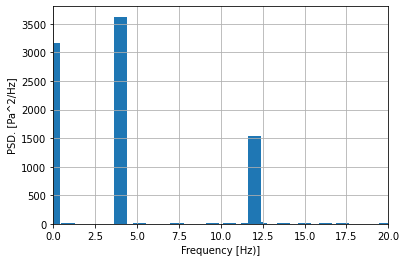

In [55]:
frequency,psd=PSD(time1,signal1)
plt.bar(frequency, psd)
plt.xlabel('Frequency [Hz)]')
plt.ylabel('PSD. [Pa^2/Hz]')
plt.xlim([0,20])
plt.grid(True)

We can now create a function that will check if the PSD is correct. In order to do, so we know that there is a relation between the PSD
and the sum of the signal squared :
$$\sum{x^2} \Delta t = \int_0^\infty {PSD} df $$

### 6) Parseval equality
The area under the power spectral density curve is equal to the mean square value. The mean square value can also be calculated directly from the time history. A good way to check if your spectrum is well computed is to verify [Parseval equality](https://en.wikipedia.org/wiki/Parseval%27s_theorem). This equivalence can be written as an energy equivalence:
$$\mathrm{E}=\lim_{T \to \infty}\int_{-\frac{T}{2}}^{\frac{T}{2}}{x(t)^2dt}=\lim_{T \to \infty}\int_{-\infty}^{+\infty}{X(f)X^*(f)df}$$

where $X^*(f)$ is the complex conjugate of $X(f)$.

A similar result can be written for power equivalence:
$$\mathrm{P}=\lim_{T \to \infty}\dfrac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}{x(t)^2dt}=\lim_{T \to \infty}\dfrac{1}{T}\int_{-\infty}^{+\infty}{X(f)X^*(f)df}$$
Let us check if the PSD we have calculated verifies Parseval equality. Note that **both quantities must stay consistent even if the signal changes**. Our PSD was divided by the frequency resolution to keep a constant integral when sampling or duration changed. The mean square sum must be divided by N for the same reason.


In [56]:
# Eg. If signal is in Pa, P1 is in Pa^2
# divided by the signal to get a converging average
p1 = np.sum(np.square(signal1))/len(signal1)
print(f"sig = {p1}")

# Eg. If signal is in Pa, 
#.  psd in in Pa^2/Hz
#.  P2 is in Pa^2
p2 = np.sum(psd)*(1/(time1[-1]-time1[0]))
print(f"psd = {p2}")

# Ratios
print(f"sig/psd = {p1/p2}")
print(f"psd/sig = {p2/p1}")

sig = 1177.618138809601
psd = 1177.4051972823986
sig/psd = 1.000180856622422
psd/sig = 0.9998191760807814


We can see more precisely how each part of the signal contributes to the PSD with the cumulated PSD. We  create a function such as:
$$\sum{x^2} \Delta t / N= \int_0^\infty {PSD} df $$

In [57]:
def verif_PSD(signal_vect:tuple,time_vect:tuple,frequency: tuple, psd: tuple):
    """
    Function that verifies if the PSD is correct
    """
    total_time = (time_vect[-1]-time_vect[0])
    dt = time_vect[1]-time_vect[0]
    
    df = 1 / total_time
    
    cumul = np.cumsum(psd)*df
    threshold = np.sum(np.square(signal_vect))/len(signal_vect)
    
    print(cumul[-1])
    print(threshold)
    
    plt.plot(frequency,cumul, label="Cumulated PSD")
    plt.plot([frequency[0],frequency[-1]],[threshold,threshold], label="Parseval")
    plt.legend()
    plt.title("Cumulated PSD")
    plt.xlabel("Frq.[Hz]")
    plt.ylabel("Signal power [Pa^2]")
    plt.xlim([0,None])
    plt.ylim([0,None])

1177.4051972824002
1177.618138809601


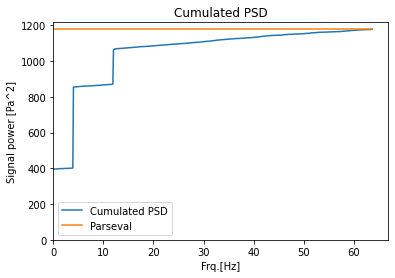

In [58]:
verif_PSD(signal1,time1,frequency,psd)